In [63]:
from scipy import stats
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import env

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?

What is the probability that 3 or more cars come through the drive through?

How likely is it that the drive through gets at least 1 car?

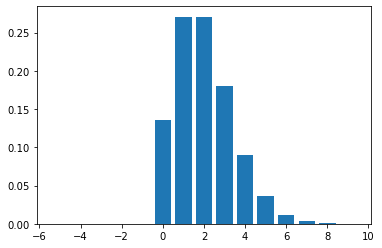

In [64]:

x = np.arange(-5,10)
y = stats.poisson(2).pmf(x)

plt.bar(x,y)

cars = stats.poisson(2)

In [65]:
cars.pmf(0)

# 13.5% chance that no cars drive in the noon hour

0.1353352832366127

In [66]:
cars.sf(2)

# 32% chance that 3 or more cars go through the drive thru

0.32332358381693654

In [67]:
cars.sf(0)

# ~86% that at least one car goes thru drive thru

0.8646647167633873

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?

What GPA constitutes the bottom 15% of the class?

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third 
decile.

 Would a student with a 2.8 grade point average qualify for this scholarship?

If I have a GPA of 3.5, what percentile am I in?

In [68]:
gpa = stats.norm(3, 0.3)

In [69]:
gpa.isf(0.05)

# need 3.49 to be in top 5%

3.4934560880854417

In [70]:
gpa.ppf(0.15)

# need 2.68 to be bottom 15%

2.689069983151863

In [71]:
gpa.ppf([.2, .3])

array([2.74751363, 2.84267985])

In [72]:
gpa.cdf(3.5)

0.9522096477271853

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

How likely is it that the break area gets cleaned up each day? 

How likely is it that it goes two days without getting cleaned up? All week?

In [73]:
probability = 0.03
n_students = round(((22 * 3) * .9))

n_students

gets_clean = stats.binom(n_students, probability)

In [74]:
gets_clean.sf(0)

# 83% chance that break room gets clean

0.8342199288437352

In [75]:
# to get the number of days I have to multiply the students to equal the amount of days
stats.binom(n_students * 2, probability).pmf(0)

# 2.7% chance that the break room is not cleaned for 2 days

stats.binom(n_students * 5, probability).pmf(0)

# .0125 percent chance that its not cleaned all week

0.00012521651388091245

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 

what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 

Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

----- if 15 people take 2 minutes to order that is 30 min so I will use a mean of 30
----- same for standard def of 3 * 2 so std of 6

In [76]:
lunch = stats.norm(30, 6)

time_avail = 60 - 10 - 15


lunch.cdf(time_avail)

# ~80% chance that there will be 15 left to eat

0.7976716190363569

In [84]:
lunch = stats.norm(40, 15)

time_avail = 60 - 10 


lunch.cdf(time_avail)

0.7475074624530771

Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?

What percent of employees earn more than 95,000?

What percent of employees earn between 65,000 and 80,000?

What do the top 5% of employees make?

In [77]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
salaries = pd.read_sql('SELECT * FROM employees join salaries using (emp_no) where salaries.to_date > now()', url)



In [78]:
average_s = salaries.salary.mean()
average_s

# Average salary is 72012

std_salary = salaries.salary.std()

std_salary

# The standard dev is ~$17310

sal_norm = stats.norm(average_s, std_salary)

In [79]:
sal_norm.cdf(60000)

# 24% of salaries are under 60k

0.24385742480214423

In [80]:
sal_norm.sf(95000)

# 9% earn more than 95%

0.09208819199804053

In [81]:
sal_norm.cdf(80000)

## ~68% earn less than 80K and we know the percent under 60K is 24% from earlier. I will subtract the 80K % from 60K % so that we can find the
# percent range between 80 and 60 ------ 68-24 == 44
# 44% of people earn between 60 and 80K 

0.677763490495318

In [82]:
np.diff(sal_norm.cdf([65000, 80000]))

array([0.33506057])

In [83]:
sal_norm.isf(0.05)

# top 5% earn $100,485

100484.64454102777